### Comparing Preeya and Tom Method for Accuracy Plots

In [1]:
from analysis import bender_class, original_bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

# Tom Method Single Datafile


It appears that in train_test_split, shuffle is automatically set to True if not included:  https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        
Steps:  

(1) norm data 0 to 1
(2) shuffle data and split into 80% train and 20% test.  
(3) Calculate accuracy for a single degree on held out data.  
(4) Redo steps (2) and (3) 100 times.  
(5) take average of 100 accuracies for that angle and append that averaged accuracy to a list
(6) Move on to next angle in degree_of_accuracy list and repeat steps (2) through (5)
(7) Plot averaged accuracy for each angle
(8) Preeya includes Std here for a single file which I didn't do.  Our results would be similar.  

Found 1 CSV files.


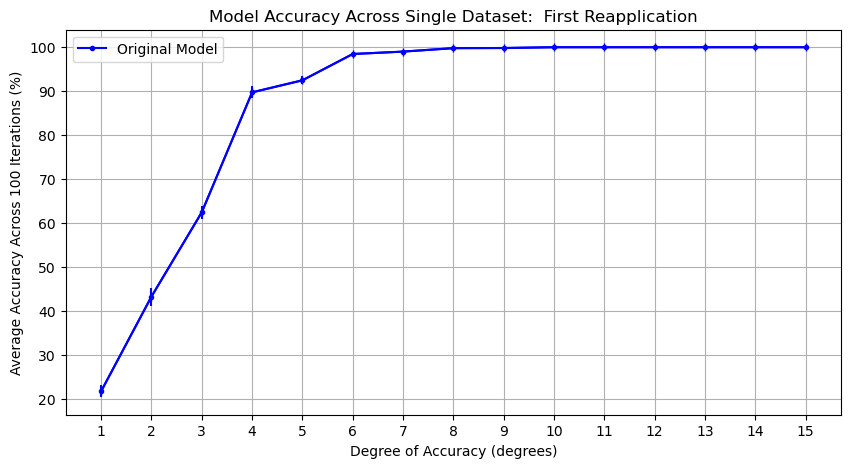

In [7]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize

g = original_bender_class(data=pd.DataFrame())
#path contains 1 csv file
path = os.path.join(path_to_repository, 'CSV Data/11_27_2024/1_53_bubble/first test/*.csv')
g.read_data_2(path) # normalize from 0 to 1, not over R0

# Initialize parameters for accuracy calculation
degree_of_accuracies = list(range(15, 0, -1))  # From 10 to 1
all_accuracies_first = []
all_accuracies_std = []

# Calculate average accuracy for the first dataset using train_test
for degree in degree_of_accuracies:
    accuracies = []
    
    ### 100 iterations 
    for _ in range(100):  # Shuffle automatically set to true in train_test_split -> https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        
        ### Each iteration: 
        ## g.test_train splits up data, fits a model, and computes accuracy on held-out model 
        ## yields one degree: 
        accuracy = g.train_test(deg_accuracy=degree)  # Use train_test for the first dataset
        accuracies.append(accuracy)
    
    ### Track mean over all 100 models fit to slightly diff training data of same dataset accuracy: 
    all_accuracies_first.append(np.mean(accuracies)) # not calculating error bar here but could have
    all_accuracies_std.append(np.std(accuracies)) # I iniitially was NOT tracking std for individual trainng set. I only tracked std for reapplication and misalignment.

# Plot all accuracies on the same plot
plt.figure(figsize=(10, 5))
plt.plot(degree_of_accuracies, all_accuracies_first, marker='.', label='Original Model', color='blue')
plt.errorbar(degree_of_accuracies, all_accuracies_first, yerr=all_accuracies_std, marker='|', color='blue')
# Customize plot
plt.title('Model Accuracy Across Single Dataset:  First Reapplication')
plt.xlabel('Degree of Accuracy (degrees)')
plt.ylabel('Average Accuracy Across 100 Iterations (%)')
plt.xticks(degree_of_accuracies)  # Set x-ticks to correspond to degrees
plt.legend()  # Add legend to differentiate datasets
plt.grid()

### Tom Method Second Datafile:  Apply model from first reapplication dataset to data from second  reapplication test


### Tom's old method to train model on one dataset and apply to others

from old bender_class predict_new_data method: see cell block 53 again in notebook analysis_tom_initial (old analysis)

use model developed in first dataset and apply it to next dataset and determine how well it predicts accuracy for each angle from 1 to 15 deg.   Run that test 100 times per angle and then average the accuracies for each angle. So each angle will have one accuracy number.  

Given three different datasets, the reapplication accuracy plots may look substantially different, and hence the error bars are larger as the angle gets smaller

Found 1 CSV files.


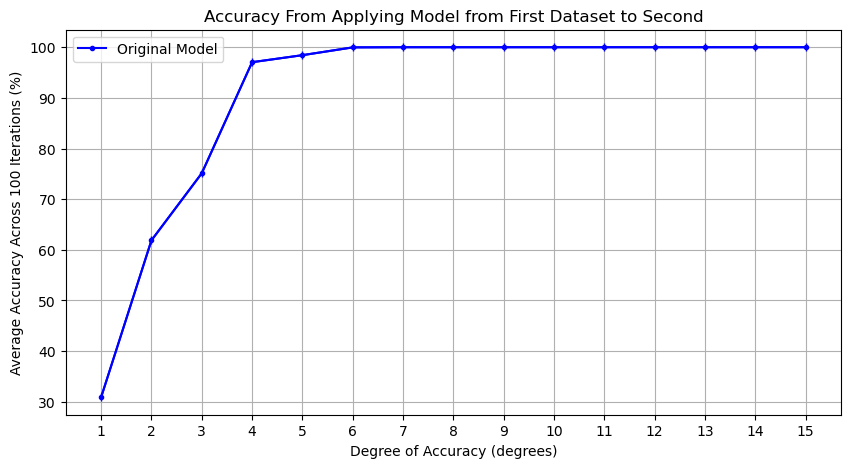

In [15]:
new_g = original_bender_class(data=pd.DataFrame())
#path contains 1 csv file
path = os.path.join(path_to_repository, 'CSV Data/11_27_2024/1_53_bubble/second test/*.csv')
new_g.read_data_2(path) # normalize from 0 to 1, not over R0

# Initialize parameters for accuracy calculation
degree_of_accuracies = list(range(15, 0, -1))  # From 10 to 1
all_accuracies_second = []
all_accuracies_std = []

# Calculate average accuracy for the first dataset using train_test
for degree in degree_of_accuracies:
    accuracies = []
    
    ### 100 iterations 
    for _ in range(100):  # Shuffle automatically set to true in train_test_split -> https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        
        ### Each iteration: 
        ## g.test_train splits up data, fits a model from FIRST DATASET, and APPLIED MODEL TO SECOND DATASET
        ## yields one degree: 
        accuracy, _ = g.predict_new_data(new_g, deg_accuracy=degree)  # Use train_test for the first dataset
        accuracies.append(accuracy)
    
    ### Track mean over all 100 models fit to slightly diff training data of same dataset accuracy: 
    all_accuracies_second.append(np.mean(accuracies)) # not calculating error bar here but could have
    all_accuracies_std.append(np.std(accuracies)) # I iniitially was NOT tracking std for individual trainng set. I only tracked std for reapplication and misalignment.

# Plot all accuracies on the same plot
plt.figure(figsize=(10, 5))
plt.plot(degree_of_accuracies, all_accuracies_second, marker='.', label='Original Model', color='blue')
plt.errorbar(degree_of_accuracies, all_accuracies_second, yerr=all_accuracies_std, marker='|', color='blue')
# Customize plot
plt.title('Accuracy From Applying Model from First Dataset to Second')
plt.xlabel('Degree of Accuracy (degrees)')
plt.ylabel('Average Accuracy Across 100 Iterations (%)')
plt.xticks(degree_of_accuracies)  # Set x-ticks to correspond to degrees
plt.legend()  # Add legend to differentiate datasets
plt.grid()

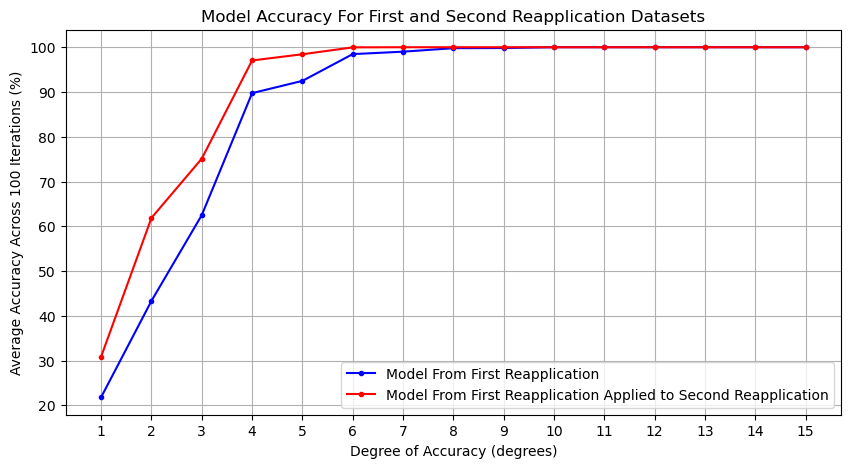

In [17]:
# Plot model accuracy from the original dataset (first reapplication) alongside accuracies from the second reapplication on the same plot

plt.figure(figsize=(10, 5))
plt.plot(degree_of_accuracies, all_accuracies_first, marker='.', label='Model From First Reapplication', color='blue')
plt.plot(degree_of_accuracies, all_accuracies_second, marker='.', label='Model From First Reapplication Applied to Second Reapplication', color='red')

# Customize plot
plt.title('Model Accuracy For First and Second Reapplication Datasets')
plt.xlabel('Degree of Accuracy (degrees)')
plt.ylabel('Average Accuracy Across 100 Iterations (%)')
plt.xticks(degree_of_accuracies)  # Set x-ticks to correspond to degrees
plt.legend()  # Add legend to differentiate datasets
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


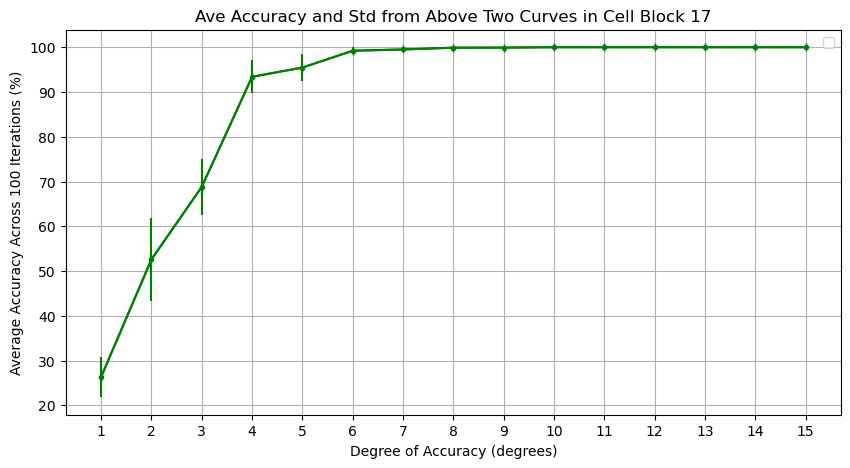

In [27]:
# Plot single accuracy plot from both plots:  Single datapoint is average accuracy across both accuracy curves 
#and error bar is std from both accuracy curves

# Compute element-wise average accuracy
average_accuracies = [(first + second) / 2 for first, second in zip(all_accuracies_first, all_accuracies_second)]
# Compute element-wise standard deviation for the two lists
std_accuracies = [np.std([first, second]) for first, second in zip(all_accuracies_first, all_accuracies_second)]

plt.figure(figsize=(10, 5))
plt.plot(degree_of_accuracies, average_accuracies, marker='.', color='green')
plt.errorbar(degree_of_accuracies, average_accuracies, yerr=std_accuracies, marker='|', color='green')

# Customize plot
plt.title('Ave Accuracy and Std from Above Two Curves in Cell Block 17')
plt.xlabel('Degree of Accuracy (degrees)')
plt.ylabel('Average Accuracy Across 100 Iterations (%)')
plt.xticks(degree_of_accuracies)  # Set x-ticks to correspond to degrees
plt.legend()  # Add legend to differentiate datasets
plt.grid()


### This is how Tom is producing error bars for master plot in notebook "all_data_accuracy"

all other error bars in all other notebooks produced using updated bender_class method:  plot_accuracy

# Preeya Method

### Reapplication Accuracies:  Obtainng Accuracy plot from previously train model on different dataset

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0


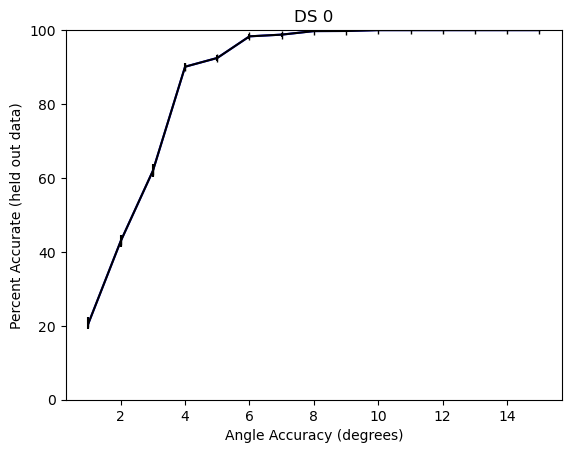

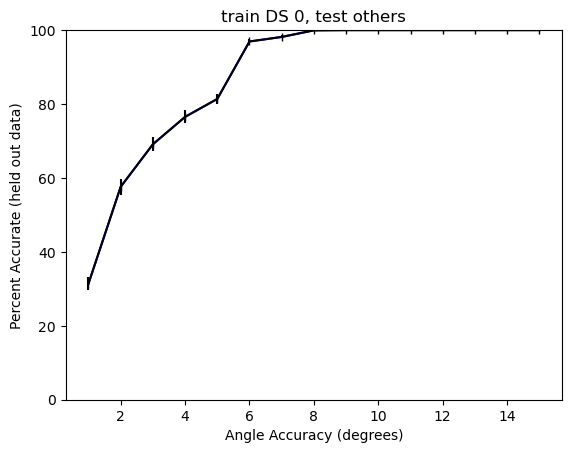

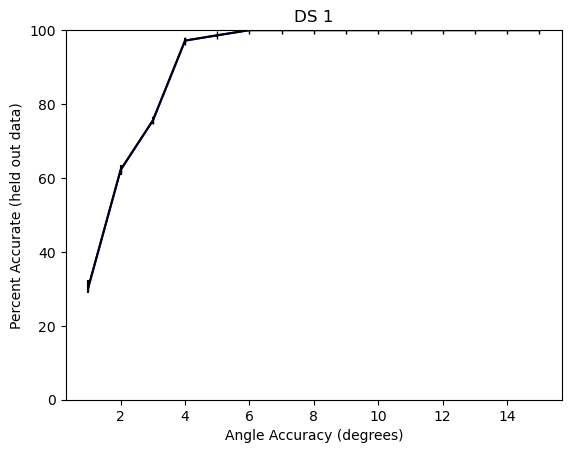

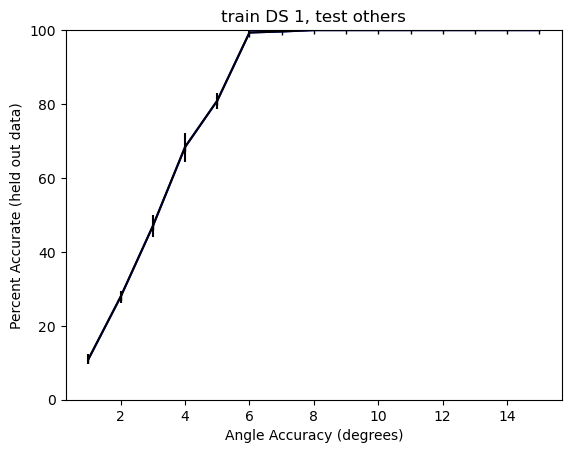

In [33]:
DS0 = os.path.join(path_to_repository, 'CSV Data/11_27_2024/1_53_bubble/first test/*.csv')
DS1 = os.path.join(path_to_repository, 'CSV Data/11_27_2024/1_53_bubble/second test/*.csv')

DS_all = [DS0, DS1]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
   

    df_combined = pd.concat([g2.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)